## Step 1. Install the keras-retinanet repo

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/project_6/keras-retinanet/

/content/gdrive/MyDrive/project_6/keras-retinanet


In [ ]:
#install the keras-retinanet repo
!pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/gdrive/MyDrive/project_6/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=169542 sha256=bf0923878142b2ccf859b8c05cf9a718561d3e0328c560a9968541a1527d174c
  Stored in directory: /root/.cache/pip/wheels/7d/ad/3f/c8e123f71b0a3aac845e62ff32b995338ef40a3bf56d1123fd
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=15f04279785d5c06ed3969db51196d9a17ef4658d89b0555c70dfc30

In [ ]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils


## Step 2: Import all required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras_retinanet.utils.visualization import draw_box, draw_boxes, draw_caption, label_color
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet import models

## Step 3. Load and Convert the Tuned Model for Inference

In [ ]:
pwd

'/content/gdrive/MyDrive/project_6/keras-retinanet'

### 3.1. First Model

In [ ]:
!keras_retinanet/bin/convert_model.py --config /content/gdrive/MyDrive/project_6/keras-retinanet/keras_retinanet/config/config.ini \
'/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv_28.h5' \
'/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv_28_inference.h5'

2022-06-09 00:46:51.949510: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### 3.2. Second Model

In [ ]:
!keras_retinanet/bin/convert_model.py --config /content/gdrive/MyDrive/project_6/keras-retinanet/keras_retinanet/config/config.ini \
'/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv_68.h5' \
'/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv_68_inference.h5'

2022-06-11 17:16:16.467543: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Step 4. Evaluation (mAP at IoU 0.5)

In [ ]:
col_names = ["filename", "xmin", "ymin", "xmax", "ymax", "class"]
train_data = pd.read_csv("/content/gdrive/MyDrive/project_6/csv_files/train_data.csv", names=col_names)
train_data.head()

,filename,xmin,ymin,xmax,ymax,class
0,/content/gdrive/MyDrive/project_6/images/train...,3114,3484,3176,3534,ringed_seal
1,/content/gdrive/MyDrive/project_6/images/train...,3136,3682,3210,3746,ringed_seal
2,/content/gdrive/MyDrive/project_6/images/train...,3276,3695,3345,3756,ringed_seal
3,/content/gdrive/MyDrive/project_6/images/train...,6288,60,6316,105,ringed_seal
4,/content/gdrive/MyDrive/project_6/images/train...,3513,193,3551,247,ringed_pup


In [ ]:
#create a sample of 50 images from the train set
img_name_50 = np.random.choice(a=train_data["filename"].unique(), size=50, replace=False, p=None)
train_data50 = train_data[train_data["filename"].isin(img_name_50)]
train_data50.to_csv('/content/gdrive/MyDrive/project_6/csv_files/train_data50.csv', index=False, header=False)

In [ ]:
#create a sample of 100 images from the train set
img_name_100 = np.random.choice(a=train_data["filename"].unique(), size=100, replace=False, p=None)
train_data100 = train_data[train_data["filename"].isin(img_name_100)]
train_data100.to_csv('/content/gdrive/MyDrive/project_6/csv_files/train_data100.csv', index=False, header=False)

In [ ]:
#create a sample of 250 images from the train set
img_name_250 = np.random.choice(a=train_data["filename"].unique(), size=250, replace=False, p=None)
train_data250 = train_data[train_data["filename"].isin(img_name_250)]
train_data250.to_csv('/content/gdrive/MyDrive/project_6/csv_files/train_data250.csv', index=False, header=False)

### 4.1. First Model

In [ ]:
#evalueate on the sample of 250 images
model_path = '/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv_28_inference.h5'

!!keras_retinanet/bin/evaluate.py \
csv '/content/gdrive/MyDrive/project_6/csv_files/train_data250.csv' \
'/content/gdrive/MyDrive/project_6/csv_files/classes.csv' \
{model_path}

# --no-resize

Result:

'621 instances of class ringed_seal with average precision: 0.1366',

 '21 instances of class ringed_pup with average precision: 0.0000',

 '31 instances of class bearded_seal with average precision: 0.4621',

 '0 instances of class bearded_pup with average precision: 0.0000',

 '80 instances of class unknown_seal with average precision: 0.0030',

 '21 instances of class unknown_pup with average precision: 0.0000',

 'Inference time for 250 images: 0.5213',

 'mAP using the weighted average of precisions among classes: 0.1285',

 'mAP: 0.1204']

In [ ]:
#evaluate on the sample of 50 images
#try using --no-resize
#it take much longer time
model_path = '/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv_28_inference.h5'

!!keras_retinanet/bin/evaluate.py \
csv '/content/gdrive/MyDrive/project_6/csv_files/train_data50.csv' \
'/content/gdrive/MyDrive/project_6/csv_files/classes.csv' \
{model_path} --no-resize

Result: all 0, probably not the way to go

 '136 instances of class ringed_seal with average precision: 0.0000',

 '2 instances of class ringed_pup with average precision: 0.0000',

 '3 instances of class bearded_seal with average precision: 0.0000',

 '0 instances of class bearded_pup with average precision: 0.0000',

 '15 instances of class unknown_seal with average precision: 0.0000',

 '2 instances of class unknown_pup with average precision: 0.0000',

 'Inference time for 50 images: 13.9100',

 'mAP using the weighted average of precisions among classes: 0.0000',

 'mAP: 0.0000']

### 4.2. Second Model

In [ ]:
#evalueate on the sample of 250 images
model_path = '/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv_68_inference.h5'

!!keras_retinanet/bin/evaluate.py \
csv '/content/gdrive/MyDrive/project_6/csv_files/train_data250.csv' \
'/content/gdrive/MyDrive/project_6/csv_files/classes.csv' \
{model_path}

# --no-resize

 Result:

 '621 instances of class ringed_seal with average precision: 0.1335',
 
 '21 instances of class ringed_pup with average precision: 0.0000',
 
 '31 instances of class bearded_seal with average precision: 0.6095',
 
 '0 instances of class bearded_pup with average precision: 0.0000',
 
 '80 instances of class unknown_seal with average precision: 0.0284',
 
 '21 instances of class unknown_pup with average precision: 0.0000',
 
 'Inference time for 250 images: 0.5175',
 
 'mAP using the weighted average of precisions among classes: 0.1345',
 
 'mAP: 0.1543']

Why does the bearded_seal class have much higher mAP compared to others?

### 4.3. mAP vs. classes

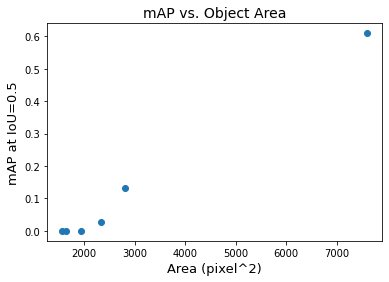

In [ ]:
classes = ["ringed_seal", "ringed_pup", "bearded_seal", "bearded_pub", "unknown_seal", "unknown_pub"]
mAP = [.1335, .0, .6095, .0, .0284, .0]
area = [2808, 1569, 7596, 1936, 2344, 1649]
plt.scatter(area, mAP)
plt.title("mAP vs. Object Area", fontsize=14)
plt.xlabel("Area (pixel^2)", fontsize = 13)
plt.ylabel("mAP at IoU=0.5", fontsize = 13)
plt.savefig("/content/gdrive/MyDrive/project_6/output/mAP_vs_size.png", dpi=300, transparent=True, bbox_inches="tight");

# from notebook 2, step 4, mean area vs. class:
# bearded_seal    7596.441176
# ringed_seal     2807.777229
# unknown_seal    2344.174807
# bearded_pup     1936.000000
# unknown_pup     1648.984615
# ringed_pup      1568.765432

This plot clearly shows that the object detector works well on beared seals class which has significantly larger size compared to other classes. This indicates that the anchor box configuration in used are not suitable for detecting smaller objects, even though we did perform anchor optimization in notebook 2.

## Step 5. Prediction

In [ ]:
inference_model = '/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv_68_inference.h5'
model = models.load_model(inference_model)

In [ ]:
label_map = {}
for line in open("/content/gdrive/MyDrive/project_6/csv_files/classes.csv"):
  row = line.rstrip().split(",")
  label_map[int(row[1])] = row[0]

label_map

{0: 'ringed_seal',
 1: 'ringed_pup',
 2: 'bearded_seal',
 3: 'bearded_pup',
 4: 'unknown_seal',
 5: 'unknown_pup'}

In [ ]:
#write a function to choose one image randomly from the dataset and predict using trained model
def show_image_with_predictions(df, threshold=0.6):
  #choose a random image
  row = df.sample()
  filepath = row["filename"].values[0]
  print("filepath:", filepath)

  #get all rows for this image
  #all bounding boxes for this image
  #1 box per row
  df2 = df[df["filename"]==filepath]
  im = np.array(Image.open(filepath))
  print("im.shape:", im.shape)

  #plot ground truth boxes
  for idx, row in df2.iterrows():
    box = [row["xmin"],
           row["ymin"],
           row["xmax"],
           row["ymax"]]
    print(box)
    draw_box(im, box, color=(255,0,0))

  #plot predictions

  #get predictions
  # imp = preprocess_image(im)
  # imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
      np.expand_dims(im, axis=0)
  )

  #standardize box coordinates
  # boxes /= scale

  #loop over all predicted boxes for the input image
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    #scores are sorted from high to low
    if score < threshold:
      break
    
    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    class_name = label_map(label)
    caption = f"{class_name} {score:.3f}"
    draw_caption(im, box, caption)
    score, label = score, label

  plt.axis("off")

  plt.imshow(im)
  plt.show()
  return score, label
plt.rcParams["figure.figsize"] = [20, 10]

filepath: /content/gdrive/MyDrive/project_6/images/train/test_kotz_2019_fl04_L_20190510_002210.662508_rgb.jpg
im.shape: (4384, 6576, 3)
[5971, 825, 6038, 861]


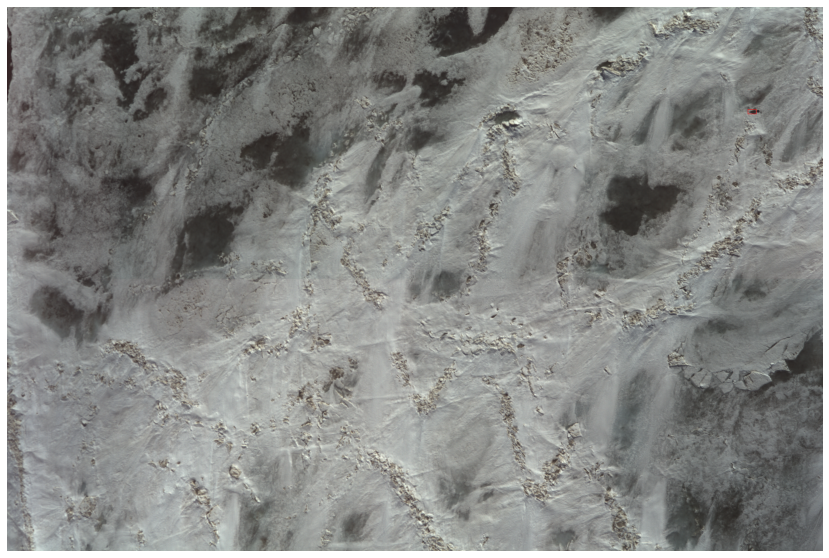

In [ ]:
score, label = show_image_with_predictions(train_data, threshold=0.6)

In [ ]:
#3 groups of seals: filepath: /content/gdrive/MyDrive/project_6/images/train/test_kotz_2019_fl04_C_20190510_010315.473105_rgb.jpg
#only 1 very tiny seal: filepath: /content/gdrive/MyDrive/project_6/images/train/test_kotz_2019_fl04_L_20190510_002210.662508_rgb.jpg
